# Librerias

In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from lmfit.models import ConstantModel, LorentzianModel
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

# Funciones

In [2]:
def gauss(X,X_mean,sigma,C):
  return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

def ploteo_gauss(dt_x, dt_y, y_error, mu_ploteo, sigma_ploteo, C_ploteo, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=gauss, xdata= dt_x, ydata= dt_y, p0=[mu_ploteo,sigma_ploteo,C_ploteo], sigma=y_error, maxfev=1000000)

  mu=round(pop_ploteo[0],0)
  sigma=pop_ploteo[1]
  C=pop_ploteo[2]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y, yerr=y_error, fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,gauss(dt_x, mu, sigma, C),color='gold')
  plt.vlines(mu, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo es en el canal: ', round(mu,0), 'y el sigma es: ', sigma, 'La constante C es: ', C)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))


  if rtrn==False:
    return

  elif rtrn==True:
    return mu, sigma, C, np.sqrt(np.diag(cov_ploteo))


def Doble_gauss(X, X_mean1, sigma1, C1, X_mean2, sigma2, C2):
    return C1*np.exp(-(X-X_mean1)**2/(2*sigma1**2)) + C2*np.exp(-(X-X_mean2)**2/(2*sigma2**2))

def ploteo_Doble_gauss(dt_x, dt_y, y_error, mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=Doble_gauss, xdata= dt_x, ydata= dt_y, sigma=y_error, p0=[mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2], maxfev=1000000)

  mu1=pop_ploteo[0]
  sigma1=pop_ploteo[1]
  C1=pop_ploteo[2]

  mu2=pop_ploteo[3]
  sigma2=pop_ploteo[4]
  C2=pop_ploteo[5]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y, yerr=y_error, fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,Doble_gauss(dt_x, mu1, sigma1, C1, mu2, sigma2, C2),color='gold')
  plt.vlines(mu1, ymin=0, ymax= max(dt_y), color= "red" )
  plt.vlines(mu2, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo 1 esta en: ', mu1, 'y el sigma es: ', sigma1, 'La constante C es: ', C1)
  print('El maximo 2 esta en: ', mu2, 'y el sigma es: ', sigma2, 'La constante C es: ', C2)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))

  return

# Datos

In [3]:
Rutas=glob('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP3- Fluorecencia\Datos\*.mca')

Datos={}

for ruta in Rutas:

    archivo_completo= os.path.basename(ruta)
    nombre_archivo= os.path.splitext(archivo_completo)[0]

    array=pd.read_csv(ruta, encoding='latin1', header=19, names=['data'], nrows=2048)
    array_norm=array['data']/max(array['data'])

    Colum_Errores= np.sqrt(array['data'])
    err_norm=Colum_Errores/max(array['data'])
    
    Datos[nombre_archivo]=[array['data'], Colum_Errores, array_norm, err_norm]

Tiempo_real=[]

Co_dat=Datos['Co']
Cu_dat=Datos['Cu']
Mn_dat=Datos['Mn']
Ni_dat=Datos['Ni']
Incog1=Datos['incognita.grupo1']
Incog2=Datos['Incognita 2']

indice=Datos.keys()

canales=np.arange(1,2049,1)

# Calibración

## Espectros

In [4]:
# plt.errorbar(canales, Ni_dat[2], yerr=Ni_dat[3], fmt='o', color='orange')
# plt.xlim(750,950)

# ploteo_gauss(canales[775:845],Ni_dat[2][775:845],Ni_dat[3][775:845], 810, 10, 1, 'red', 'ajuste simple', 'canales', 'Nientas')
# ploteo_gauss(canales[870:920],Ni_dat[2][870:920],Ni_dat[3][870:920], 890, 10, 1, 'red', 'ajuste simple', 'canales', 'Nientas')

Ni_Mus=[807, 892]
Ni_Klines=[7478.15, 8264.66]
Ni_Mus_err=[0.04316397, 0.14705299]

In [5]:
# plt.errorbar(canales, Mn_dat[2], yerr=Mn_dat[3], fmt='o', color='orange')
# plt.xlim(600,725)

# ploteo_gauss(canales[620:660],Mn_dat[2][620:660],Mn_dat[3][620:660], 640, 10, 1, 'red', 'ajuste simple', 'canales', 'Mnentas')
# ploteo_gauss(canales[680:740],Mn_dat[2][680:740],Mn_dat[3][680:740], 720, 10, 1, 'red', 'ajuste simple', 'canales', 'Mnentas')

Mn_Mus=[638, 701]
Mn_Klines=[5898.75, 6490.45]
Mn_Mus_err=[0.04316397, 0.14705299]

In [6]:
# plt.errorbar(canales, Cu_dat[2], yerr=Cu_dat[3], fmt='o', color='orange')
# plt.xlim(800,1000)

# ploteo_gauss(canales[850:900],Cu_dat[2][850:900],Cu_dat[3][850:900], 865, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')
# ploteo_gauss(canales[920:1000],Cu_dat[2][920:1000],Cu_dat[3][920:1000], 965, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')

Cu_Mus=[869, 961]
Cu_Klines=[8047.78, 8905.29]
Cu_Mus_err=[0.04316397, 0.14705299]

In [7]:
# plt.errorbar(canales, Co_dat[2], yerr=Co_dat[3], fmt='o', color='orange')
# plt.xlim(700,900)

# ploteo_gauss(canales[725:775],Co_dat[2][725:775],Co_dat[3][725:775], 750, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')
# ploteo_gauss(canales[800:850],Co_dat[2][800:850],Co_dat[3][800:850], 825, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')

Co_Mus=[749, 826]
Co_Klines=[6930.32, 7649.43]
Co_Mus_err=[0.04131984, 0.13320902]

## Ajuste

In [8]:
list_mus=np.array([749, 826, 869, 961, 638, 701, 807, 892])
list_lines=np.array([6930.32, 7649.43, 8047.78, 8905.29, 5898.75, 6490.45,7478.15, 8264.66])
list_names=[r'Co K_\alpha', r'Co K_\beta', r'Cu K_\alpha', r'Cu K_\beta', r'Mn K_\alpha', r'Mn K_\beta', r'Ni K_\alpha', r'Ni K_\beta']
list_color=['green','lawngreen','orangered','red','navy','royalblue','goldenrod','gold']
list_labels=[r'K$_\alpha$ - Mn',r'K$_\beta$ - Mn',r'K$_\alpha$ - Co',r'K$_\beta$ - Co',r'K$_\alpha$ - Ni',r'K$_\beta$ - Ni',r'K$_\alpha$ - Cu',r'K$_\beta$ - Cu']

9.303499880482857 -34.702466237209244
0.01108826804911712 8.997333276374661
17.970748447444613


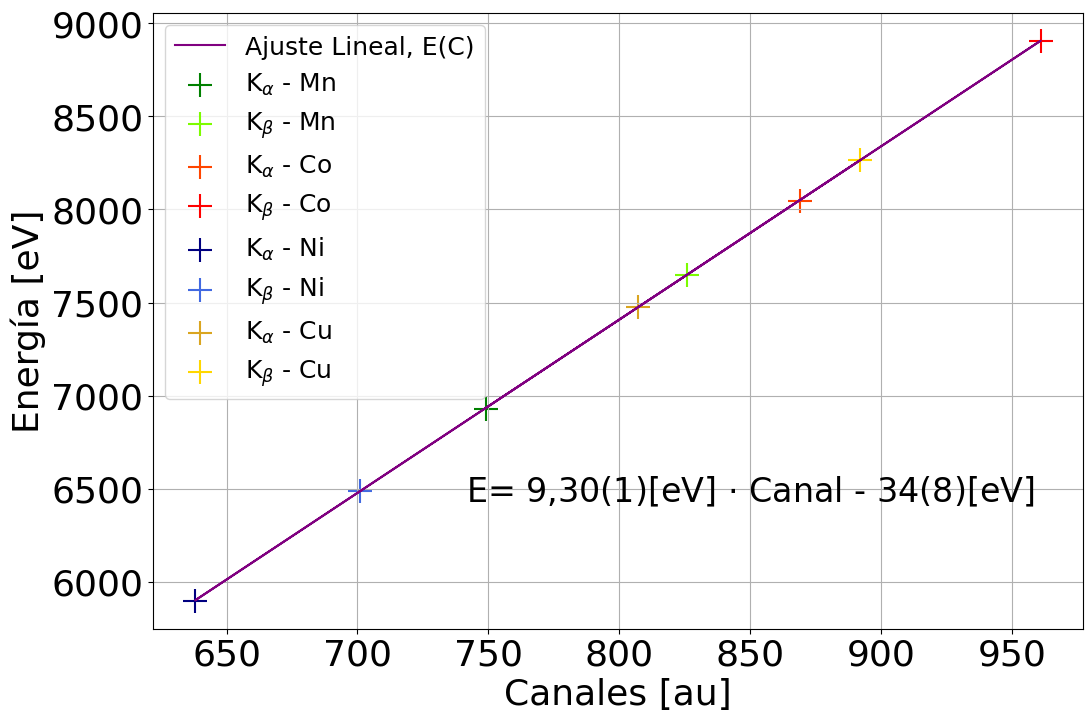

In [47]:
def lineal(x, p, b):
    y=x*p+b
    return y

def err_lineal(x,p,Dx,Dp,Db):
    sigma_y=np.sqrt((x*Dp)**2+(p*Dx)**2+(Db)**2)
    return sigma_y


pop_cal, cov_cal= curve_fit(lineal, list_mus, list_lines)

err_cal=np.sqrt(np.diag(cov_cal))

print(*pop_cal)
print(*err_cal)

energias=pop_cal[0]* canales+pop_cal[1]
energias_err=err_lineal(canales, pop_cal[0], 1, err_cal[0], err_cal[1])

print(sum(energias_err)/len(energias_err))

plt.figure(figsize=(12,8))

plt.plot(list_mus, lineal(list_mus, *pop_cal), color='purple', label='Ajuste Lineal, E(C)')

for i in range(0,8):
    plt.scatter(list_mus[i], list_lines[i], color=list_color[i], s=300, label=list_labels[i], marker='+')


plt.text(850, 6500, r'E= 9,30(1)[eV] $\cdot$ Canal - 34(8)[eV]', fontsize=24, ha='center',  va='center_baseline')
plt.xlabel('Canales [au]', fontsize=26)
plt.ylabel('Energía [eV]', fontsize=26)
plt.grid()

plt.legend(fontsize=18)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.savefig('calibracion.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.show()

In [10]:
plt.figure(figsize=(12,8))

plt.errorbar(canales[600:670], Mn_dat[2][600:670], yerr=Mn_dat[3][600:670], xerr=1, fmt='-', color='green', linewidth=2.5, label=r'Linea K$_\alpha$ - Mn')
plt.errorbar(canales[670:720], Mn_dat[2][670:720], yerr=Mn_dat[3][670:720], xerr=1, fmt='-', color='lawngreen', linewidth=2.5, label=r'Linea K$_\beta$ - Mn')

plt.errorbar(canales[720:790], Co_dat[2][720:790], yerr=Co_dat[3][720:790], xerr=1, fmt='-', color='orangered', linewidth=2.5 , label=r'Linea K$_\alpha$ - Co')
plt.errorbar(canales[790:850], Co_dat[2][790:850], yerr=Co_dat[3][790:850], xerr=1, fmt='-', color='red', linewidth=2.5 , label=r'Linea K$_\beta$ - Co')

plt.errorbar(canales[775:850], Ni_dat[2][775:850], yerr=Ni_dat[3][775:850], xerr=1, fmt='-', color='navy', linewidth=2.5, label=r'Linea K$_\alpha$ - Ni')
plt.errorbar(canales[850:910], Ni_dat[2][850:910], yerr=Ni_dat[3][850:910], xerr=1, fmt='-', color='royalblue', linewidth=2.5, label=r'Linea K$_\beta$ - Ni')

plt.errorbar(canales[835:930], Cu_dat[2][835:930], yerr=Cu_dat[3][835:930], xerr=1, fmt='-', color='goldenrod', linewidth=2.5 , label=r'Linea K$_\alpha$ - Cu')
plt.errorbar(canales[930:1000], Cu_dat[2][930:1000], yerr=Cu_dat[3][930:1000], xerr=1, fmt='-', color='gold', linewidth=2.5 , label=r'Linea K$_\beta$ - Cu')

plt.xlabel('Canales [au]', fontsize=26)
plt.ylabel('Cuentas normalizadas [au]', fontsize=26)
plt.grid()

plt.legend(fontsize=18)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlim(600,1000)

plt.savefig('espectros.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

## Corroboracion

In [45]:
# ploteo_gauss(energias[725:775],Co_dat[2][725:775],Co_dat[3][725:775], 7000, 10, 1, 'red', 'ajuste simple', 'energias', 'cuentas')
# ploteo_gauss(energias[800:850],Co_dat[2][800:850],Co_dat[3][800:850], 7700, 10, 1, 'red', 'ajuste simple', 'energias', 'cuentas')

Co_E=[6931, 7648]

In [44]:
# ploteo_gauss(energias[850:900],Cu_dat[2][850:900],Cu_dat[3][850:900], 8050, 10, 1, 'red', 'ajuste simple', 'energias', 'cuentas')
# ploteo_gauss(energias[920:1000],Cu_dat[2][920:1000],Cu_dat[3][920:1000], 8750, 10, 1, 'red', 'ajuste simple', 'energias', 'cuentas')

Cu_E=[8045,8905]

In [36]:
# plt.errorbar(energias, Ni_dat[2], yerr=Ni_dat[3], fmt='o', color='orange')
# plt.xlim(750,950)

# ploteo_gauss(energias[775:845],Ni_dat[2][775:845],Ni_dat[3][775:845], 7500, 10, 1, 'red', 'ajuste simple', 'energias', 'Nientas')
# ploteo_gauss(energias[870:920],Ni_dat[2][870:920],Ni_dat[3][870:920], 8200, 10, 1, 'red', 'ajuste simple', 'energias', 'Nientas')

Ni_E=[7477, 8265]

In [37]:
# ploteo_gauss(energias[620:660],Mn_dat[2][620:660],Mn_dat[3][620:660], 5900, 10, 1, 'red', 'ajuste simple', 'energias', 'Mnentas')
# ploteo_gauss(energias[680:740],Mn_dat[2][680:740],Mn_dat[3][680:740], 6500, 10, 1, 'red', 'ajuste simple', 'energias', 'Mnentas')

Mn_E=[5902,6488]

## Integrales Co y Ni

relacion de intesidades Nibre:  0.1192757584425891
centroides:  7479.693302104698 8269.893872745832
sigma y C, pico alpha (1):  71.23286604334804 0.9774473621902248


(7000.0, 8600.0)

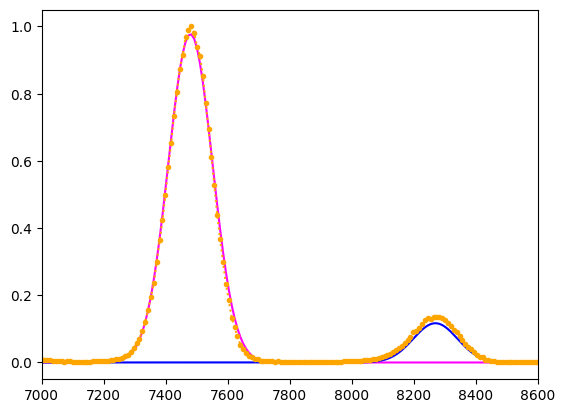

In [11]:
pop_Ni_p1, cov_Ni_p1= curve_fit(gauss, energias[780:820], Incog2[2][780:820], sigma=Incog2[3][780:820], p0=[7500,10,1])
pop_Ni_p2, cov_Ni_p2= curve_fit(gauss, energias[885:910], Incog2[2][885:910], sigma=Incog2[3][885:910], p0=[8290,20,1])

int_Ni_1=pop_Ni_p1[2]*pop_Ni_p1[1]*np.sqrt(2*np.pi)
int_Ni_2=pop_Ni_p2[2]*pop_Ni_p2[1]*np.sqrt(2*np.pi)

sigma_Ni_alpha=pop_Ni_p1[1]
sigma_Ni_beta=pop_Ni_p2[1]

mu_Ni_alpha=pop_Ni_p1[0]
mu_Ni_beta=pop_Ni_p2[0]

rel_C_Ni=pop_Ni_p2[2]/pop_Ni_p1[2]
rel_sigma_Ni=pop_Ni_p2[1]/pop_Ni_p1[1]

rel_int_Ni=int_Ni_2/int_Ni_1

print('relacion de intesidades Nibre: ', rel_int_Ni)
print('centroides: ', pop_Ni_p1[0], pop_Ni_p2[0])
print('sigma y C, pico alpha (1): ', pop_Ni_p1[1], pop_Ni_p1[2])

plt.errorbar(energias, Ni_dat[2], fmt='.:', color='orange')
plt.plot(energias, gauss(energias, *pop_Ni_p1), color='magenta')
plt.plot(energias, gauss(energias, *pop_Ni_p2), color='blue')
plt.xlim(7000,8600)

relacion de intesidades cobre:  0.14221969637430024
centroides:  6930.749477546712 7648.242899404307
sigma y C, pico alpha (1):  66.56472372954336 0.9878339509498348


(6600.0, 7800.0)

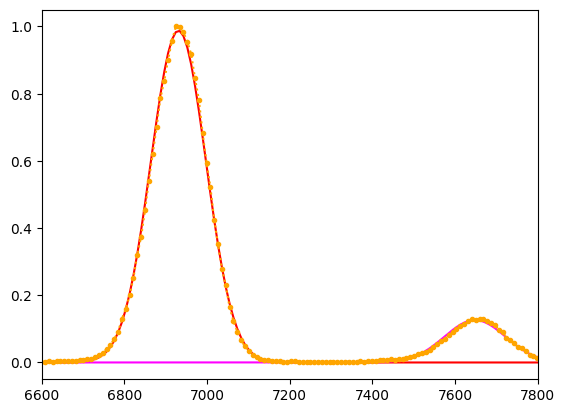

In [12]:
pop_Co_p1, cov_Co_p1= curve_fit(gauss, energias[720:770], Co_dat[2][720:770], sigma=Co_dat[3][720:770], p0=[6900,10,1])
pop_Co_p2, cov_Co_p2= curve_fit(gauss, energias[800:850], Co_dat[2][800:850], sigma=Co_dat[3][800:850], p0=[7500,10,1])

int_Co_1=pop_Co_p1[2]*pop_Co_p1[1]*np.sqrt(2*np.pi)
int_Co_2=pop_Co_p2[2]*pop_Co_p2[1]*np.sqrt(2*np.pi)

sigma_Co_alpha=pop_Co_p1[1]
sigma_Co_beta=pop_Co_p2[1]

mu_Co_alpha=pop_Co_p1[0]
mu_Co_beta=pop_Co_p2[0]

rel_C_Co=pop_Co_p2[2]/pop_Co_p1[2]
rel_sigma_Co=pop_Co_p2[1]/pop_Co_p1[1]

rel_int_Co=int_Co_2/int_Co_1

print('relacion de intesidades cobre: ', rel_int_Co)
print('centroides: ', pop_Co_p1[0], pop_Co_p2[0])
print('sigma y C, pico alpha (1): ', pop_Co_p1[1], pop_Co_p1[2])

plt.errorbar(energias, Co_dat[2], fmt='.:', color='orange')
plt.plot(energias, gauss(energias, *pop_Co_p1), color='red')
plt.plot(energias, gauss(energias, *pop_Co_p2), color='magenta')
plt.xlim(6600,7800)

# Análisis

In [13]:
def gauss_four(x, x1_Co, x2_Co, x1_Ni, x2_Ni, sigma1_Co, C1_Co, sigma1_Ni, C1_Ni):

    y= gauss(x, x1_Co, sigma1_Co, C1_Co)+gauss(x, x2_Co, rel_sigma_Co*sigma1_Co, rel_C_Co*C1_Co)+gauss(x, x1_Ni, sigma1_Ni, C1_Ni)+gauss(x, x2_Ni, rel_sigma_Ni*sigma1_Ni, rel_C_Ni*C1_Ni)

    return y

P0_incgo1=[6930,7648, 7479, 8269, 66.56, 0.99, 71.23, 0.98]

## Incognita 2

In [14]:
pop_sum_I2, cov_sum_I2= curve_fit(gauss_four, energias[720:910], Incog2[2][720:910], sigma=Incog2[3][720:910], p0=P0_incgo1)

gauss_Co_I2_1=[pop_sum_I2[0], pop_sum_I2[4], pop_sum_I2[5]]
gauss_Co_I2_2=[pop_sum_I2[1], rel_sigma_Co*pop_sum_I2[4], rel_C_Co*pop_sum_I2[5]]
gauss_Ni_I2_1=[pop_sum_I2[2], pop_sum_I2[6], pop_sum_I2[7]]
gauss_Ni_I2_2=[pop_sum_I2[3], rel_sigma_Ni*pop_sum_I2[6], rel_C_Ni*pop_sum_I2[7]]

print(gauss_Co_I2_1[0], gauss_Co_I2_2[0], gauss_Ni_I2_1[0], gauss_Ni_I2_2[0])

6931.277504281808 7660.953855784292 7477.806581124721 8264.98544744947


In [15]:
Int_alpha_Co_2=pop_sum_I2[4]*pop_sum_I2[5]*np.sqrt(2*np.pi)
Int_alpha_Ni_2=pop_sum_I2[6]*pop_sum_I2[7]*np.sqrt(2*np.pi)

prop_Co_incog2=100*Int_alpha_Co_2/(Int_alpha_Co_2+Int_alpha_Ni_2)
prop_Ni_incog2=100*Int_alpha_Ni_2/(Int_alpha_Co_2+Int_alpha_Ni_2)

print('proporcion Co en incognita 2: ', prop_Co_incog2)
print('proporcion Ni en incognita 2: ', prop_Ni_incog2)

proporcion Co en incognita 2:  20.905187507537278
proporcion Ni en incognita 2:  79.09481249246272


In [22]:
plt.figure(figsize=(12,8))

plt.errorbar(energias, Incog2[2], yerr=Incog2[3], xerr=energias_err, fmt='.', color='indigo', label='Muestra B', markersize=5)
#plt.plot(energias, gauss_four(energias, *pop_sum_I2), color='magenta', linewidth=2.5, label='Ajuste compuesto')
plt.plot(energias, gauss(energias, *gauss_Co_I2_1), color='orangered', linewidth=2.5,label=r'Linea K$_\alpha$ - Co')
plt.plot(energias, gauss(energias, *gauss_Co_I2_2), color='red', linewidth=2.5, label=r'Linea K$_\beta$ - Co')
plt.plot(energias, gauss(energias, *gauss_Ni_I2_1), color='navy', linewidth=2.5,label=r'Linea K$_\alpha$ - Ni')
plt.plot(energias, gauss(energias, *gauss_Ni_I2_2), color='royalblue', linewidth=2.5,label=r'Linea K$_\beta$ - Ni')

plt.fill_between(energias, gauss(energias, *gauss_Co_I2_1), color='orange', alpha=0.4, label=r'Intensidad K$_\alpha$ - Co')
plt.fill_between(energias, gauss(energias, *gauss_Co_I2_2), color='red', alpha=0.2, label=r'Intensidad K$_\beta$ - Co')
plt.fill_between(energias, gauss(energias, *gauss_Ni_I2_1), color='blue', alpha=0.2, label=r'Intensidad K$_\alpha$ - Ni')
plt.fill_between(energias, gauss(energias, *gauss_Ni_I2_2), color='indigo', alpha=0.4, label=r'Intensidad K$_\beta$ - Ni')

plt.text(gauss_Co_I2_1[0], 0.35, '6931(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(7750, 0.15, '7656(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(7350, 1, '7478(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(gauss_Ni_I2_2[0], 0.18, '8264(2)', fontsize=15, ha='center',  va='center_baseline')

plt.xlabel('Energía [eV]', fontsize=26)
plt.ylabel('Cuentas normalizadas [au]', fontsize=26)
plt.grid()
plt.legend(fontsize=16)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlim(6600,8500)

plt.savefig('Incognita 2.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

## Incognita 1

In [17]:
pop_sumI1, cov_sumI1= curve_fit(gauss_four, energias[720:910], Incog1[2][720:910], sigma=Incog1[3][720:910], p0=P0_incgo1)

err_sumI1=np.sqrt(np.diag(cov_sumI1))

gauss_Co_I1_1=[pop_sumI1[0], pop_sumI1[4], pop_sumI1[5]]
gauss_Co_I1_2=[pop_sumI1[1], rel_sigma_Co*pop_sumI1[4], rel_C_Co*pop_sumI1[5]]
gauss_Ni_I1_1=[pop_sumI1[2], pop_sumI1[6], pop_sumI1[7]]
gauss_Ni_I1_2=[pop_sumI1[3], rel_sigma_Ni*pop_sumI1[6], rel_C_Ni*pop_sumI1[7]]

print(gauss_Co_I1_1[0], gauss_Co_I1_2[0], gauss_Ni_I1_1[0], gauss_Ni_I1_2[0])

6931.5552674526425 7656.162000334188 7478.422395555926 8264.995960349397


In [18]:
Int_alpha_Co_1=pop_sumI1[4]*pop_sumI1[5]*np.sqrt(2*np.pi)
Int_alpha_Ni_1=pop_sumI1[6]*pop_sumI1[7]*np.sqrt(2*np.pi)

Int_alpha_Co_1_err=np.sqrt((err_sumI1[4]*pop_sumI1[5])**2+(pop_sumI1[4]*err_sumI1[5])**2)*np.sqrt(2*np.pi)
Int_alpha_Ni_1_err=np.sqrt((err_sumI1[6]*pop_sumI1[7])**2+(pop_sumI1[6]*err_sumI1[7])**2)*np.sqrt(2*np.pi)

prop_Co_incog1=100*Int_alpha_Co_1/(Int_alpha_Co_1+Int_alpha_Ni_1)
prop_Ni_incog1=100*Int_alpha_Ni_1/(Int_alpha_Co_1+Int_alpha_Ni_1)

prop_Co_incog1_err=100*np.sqrt(((Int_alpha_Co_1*Int_alpha_Ni_1_err)/(Int_alpha_Ni_1+Int_alpha_Co_1)**2)**2+((Int_alpha_Co_1_err)/(Int_alpha_Ni_1+Int_alpha_Co_1)-(Int_alpha_Co_1*Int_alpha_Co_1_err)/(Int_alpha_Ni_1+Int_alpha_Co_1)**2)**2)
prop_Ni_incog1_err=100*np.sqrt(((Int_alpha_Ni_1*Int_alpha_Co_1_err)/(Int_alpha_Ni_1+Int_alpha_Co_1)**2)**2+((Int_alpha_Ni_1_err)/(Int_alpha_Ni_1+Int_alpha_Co_1)-(Int_alpha_Ni_1*Int_alpha_Ni_1_err)/(Int_alpha_Ni_1+Int_alpha_Co_1)**2)**2)

print('proporcion Co en incognita 2: ', prop_Co_incog1, '+/-', prop_Co_incog1_err)
print('proporcion Ni en incognita 2: ', prop_Ni_incog1, '+/-', prop_Ni_incog1_err)

proporcion Co en incognita 2:  37.82175928354493 +/- 0.4639321326619603
proporcion Ni en incognita 2:  62.17824071645507 +/- 0.4639321326619603


In [19]:
plt.figure(figsize=(12,8))

plt.errorbar(energias, Incog1[2], yerr=Incog1[3], xerr=energias_err, fmt='.', color='fuchsia', label='Muestra A', markersize=5)
#plt.plot(energias, gauss_four(energias, *pop_sumI1), color='magenta', linewidth=2.5, label='Ajuste compuesto')
plt.plot(energias, gauss(energias, *gauss_Co_I1_1), color='orangered', linewidth=2.5,label=r'Linea K$_\alpha$ - Co')
plt.plot(energias, gauss(energias, *gauss_Co_I1_2), color='red', linewidth=2.5, label=r'Linea K$_\beta$ - Co')
plt.plot(energias, gauss(energias, *gauss_Ni_I1_1), color='navy', linewidth=2.5,label=r'Linea K$_\alpha$ - Ni')
plt.plot(energias, gauss(energias, *gauss_Ni_I1_2), color='royalblue', linewidth=2.5,label=r'Linea K$_\beta$ - Ni')

plt.fill_between(energias, gauss(energias, *gauss_Co_I1_1), color='orange', alpha=0.4, label=r'Intensidad K$_\alpha$ - Co')
plt.fill_between(energias, gauss(energias, *gauss_Co_I1_2), color='red', alpha=0.2, label=r'Intensidad K$_\beta$ - Co')
plt.fill_between(energias, gauss(energias, *gauss_Ni_I1_1), color='blue', alpha=0.2, label=r'Intensidad K$_\alpha$ - Ni')
plt.fill_between(energias, gauss(energias, *gauss_Ni_I1_2), color='indigo', alpha=0.4, label=r'Intensidad K$_\beta$ - Ni')

plt.text(gauss_Co_I1_1[0], 0.7, '6931(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(7750, 0.15, '7656(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(7350, 1, '7478(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(gauss_Ni_I1_2[0], 0.18, '8264(2)', fontsize=15, ha='center',  va='center_baseline')

plt.xlabel('Energía [eV]', fontsize=26)
plt.ylabel('Cuentas normalizadas [au]', fontsize=26)
plt.grid()
plt.legend(fontsize=16)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlim(6600,8500)

plt.savefig('Incognita 1.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

## Plot

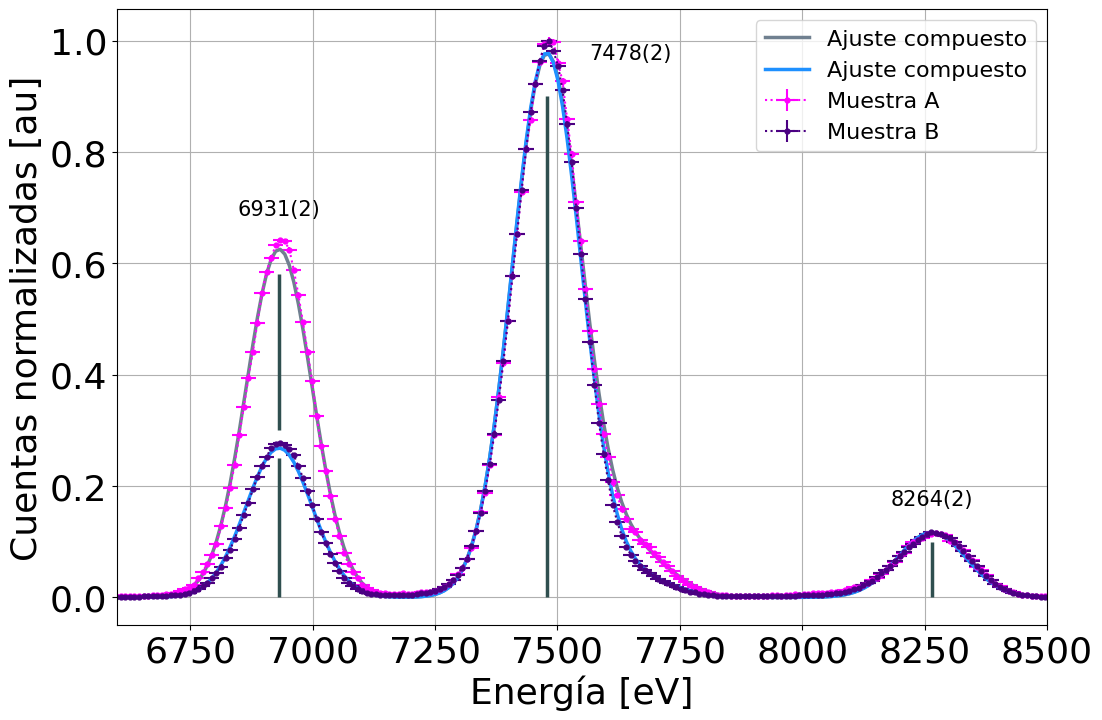

In [27]:
plt.figure(figsize=(12,8))

plt.errorbar(energias, Incog1[2], yerr=Incog1[3], xerr=energias_err, fmt='.:', color='fuchsia', label='Muestra A', markersize=7)
plt.plot(energias, gauss_four(energias, *pop_sumI1), color='slategray', linewidth=2.5, label='Ajuste compuesto')

plt.errorbar(energias, Incog2[2], yerr=Incog2[3], xerr=energias_err, fmt='.:', color='indigo', label='Muestra B', markersize=7)
plt.plot(energias, gauss_four(energias, *pop_sum_I2), color='dodgerblue', linewidth=2.5, label='Ajuste compuesto')

#primer pico
plt.vlines(x=pop_sum_I2[0], ymin=0.3, ymax=0.58, color='darkslategray', linewidth=2.5)
plt.vlines(x=pop_sum_I2[0], ymin=0, ymax=0.25, color='darkslategray', linewidth=2.5)

#pico central
plt.vlines(x=pop_sum_I2[2], ymin=0, ymax=0.9, color='darkslategray', linewidth=2.5)

#tercer pico
plt.vlines(x=pop_sum_I2[3], ymin=0, ymax=0.1, color='darkslategray', linewidth=2.5)

plt.text(gauss_Co_I1_1[0], 0.7, '6931(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(7650, 0.98, '7478(2)', fontsize=15, ha='center',  va='center_baseline')
plt.text(gauss_Ni_I1_2[0], 0.18, '8264(2)', fontsize=15, ha='center',  va='center_baseline')

plt.xlabel('Energía [eV]', fontsize=26)
plt.ylabel('Cuentas normalizadas [au]', fontsize=26)
plt.grid()
plt.legend(fontsize=16)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlim(6600,8500)
plt.ylim(-0.05)

plt.savefig('Incognitas.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.show()